Please perform the following exercises, each of which is worth $10$ points.  The instructions for most can be found at the end of the Chapter notes, however several include additional information / starter code which is provided below.

 - **Chapter 7:** Exercises: 2, 3, and 5
 
 - **Chapter 8:** Exercises: 1, 2, and 4

Note: in completing Exercises $3$ and $5$ of Chapter 7 and Exercise 5 of Chapter 8 you may want to *flatten* your cost function prior to minimizing it since both the multi-class model and the Linear Autoencoder take in a **matrix** of weights.  You can find instructinos about how to do this via `autograd` in the attached Jupyter notebook called `flattening_functions_using_autograd.ipynb`.

In [411]:
# import autograd / numpy necessities
from autograd import numpy as np
from autograd import grad 
import math
import matplotlib.pyplot as plt
# set path to datasets
datapath = '/Users/manshanlin/Downloads/machine_learning_hw2/datasets/'

# Chapter 7 Exercise 2

In [462]:
# location of dataset
import math 
from mpl_toolkits.mplot3d import Axes3D

csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
w=np.array([2.0,2.0,3.0])
# get input/output pairs
x = data[:-1,:]
y = data[-1:,:]
yp=y

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

def fusion_rule(x,w):
    return np.argmax(model(x,w))

def softmax(w):
    global yp
    cost = np.sum(np.log(1 + np.exp(-yp*model(x,w)))) 
    return cost/float(np.size(yp))


def least_squares(w):
    global yp
    cost=np.sum((model(x,w)-yp)**2)
    return cost/float(x.size)

def PerceptronCost(w):
    global yp
    temp=-yp*model(x,w)
    cost=0
    for i in range(0,len(temp[0])):
        if temp[0][i]>0:
            cost+=temp[0][i]
    return cost/float(np.size(yp))


def dealwithyp(yy,label):
    a=np.random.randint(0, 1, (1, 40))
    for i in range(0,len(yy[0])):
        if yy[0][i]==label:
            a[0][i]=1
        else:
            a[0][i]=-1
    return a


WeightDic={}
CostDic={}



for i in range(0,4):
    yp=dealwithyp(y,i)
    w1,CostDic[i]=gradient_descent(softmax,0.1,1000,w)
    WeightDic[i]=w1[-1]



www=np.array([WeightDic[0],WeightDic[1],WeightDic[2],WeightDic[3]])




result=[]
for i in range(0,40):
    result.append(fusion_rule(x[:,i],www.T))
print('The predicted result is',result)

error=0
for i in range(0,40):
    if result[i]!=y[0][i]:
        error+=1
    
print('the number of error is',error)










The predicted result is [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3]
the number of error is 9


In [413]:
print (y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]


# Chapter 7 Exercise 3 and 5

In [468]:
# location of dataset

from autograd.misc.flatten import flatten_func
csvname = datapath + '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 
w=np.array([[2.0,2.0,3.0],[2.0,2.0,3.0],[2.0,2.0,3.0]])

def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
lam = 10**-5  # our regularization paramter 

def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y))


weight,cost=gradient_descent(multiclass_perceptron,0.1,1000,w)



def fusion_rule(x,w):
    return np.argmax(model(x,w))

result=[]
for i in range(0,30):
    result.append(fusion_rule(x[:,i],weight[-1]))
print('the predicted result is ')
print(result)

error=0
for i in range(0,30):
    if result[i]!=y[0][i]:
        error+=1
print('The number of error is',error)



#EX5
csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
w=np.array([[2.0,2.0,3.0,1.0],[2.0,2.0,3.0,1.0],[2.0,2.0,3.0,1.0]])
# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 


lam = 10**(-5)  # our regularization paramter 
def multiclass_softmax(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))


weight,cost=gradient_descent(multiclass_softmax,0.1,1000,w)


def fusion_rule(x,w):
    return np.argmax(model(x,w))

result=[]
for i in range(0,40):
    result.append(fusion_rule(x[:,i],weight[-1]))
print('\n')
print('the predicted result is')
print(result)

error=0
for i in range(0,40):
    if result[i]!=y[0][i]:
        error+=1
print('The number of error is',error)















the predicted result is 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
The number of error is 0


the predicted result is
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3]
The number of error is 9


In [ ]:
print (y)

In [470]:
#Chapter8 Exercise1
print('The Formula after simplified is W_p=X_p')

The Formula after simplified is W_p=X_p


# Chapter 8 Exercise 2 and 4

In [471]:
import matplotlib.pyplot as plt
import numpy as np1

The plots of Exercise 2 are as follows:


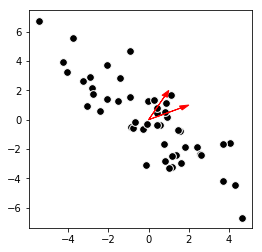

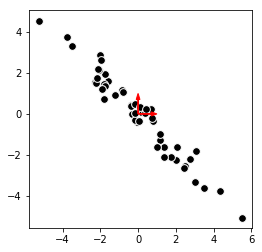

The plots of Exercise 4 are as follows:
[-0.94841646  0.89405383]


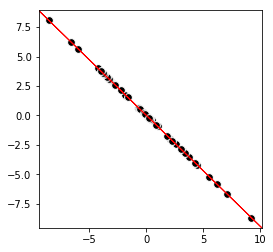

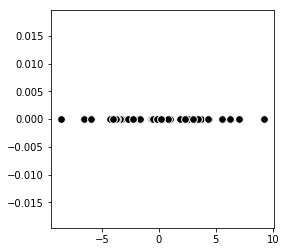

In [472]:
# location of dataset
csvname = datapath + '2d_span_data_centered.csv'

# load in dataset
X = np.loadtxt(csvname,delimiter = ',')
x=X
# plot dataset
figure = plt.figure(figsize = (4,4))
plt.scatter(X[0,:],X[1,:],s=60,c='k',edgecolor='w')

print('The plots of Exercise 2 are as follows:')

plt.arrow(0, 0, 1, 2, length_includes_head=True, head_width=0.3,color='r')
plt.arrow(0, 0, 2, 1, length_includes_head=True, head_width=0.3,color='r')

plt.show()
#Execrcise2:

def costFunc(w):
    cost=0
    for i in range(0,len(x[0])):
        temp=np.dot(C,w[:,i])-x[:,i]
        sum=0
        for j in temp:
            sum+=j*j
        cost+=sum

    return cost/float(x.size)
    
C=np.array([[1,2],[2,1]])
w=np.zeros((2,x.size))
w+=1

weight,cost=gradient_descent(costFunc,0.1,1000,w)




Prediction=X
for i in range(0,len(Prediction[0])):
    Prediction[:,i]=weight[-1][:,i]


figure = plt.figure(figsize = (4,4))
plt.scatter(Prediction[0,:],Prediction[1,:],s=60,c='k',edgecolor='w')
plt.arrow(0, 0, 1, 0, length_includes_head=True, head_width=0.2,color='r')
plt.arrow(0, 0, 0, 1, length_includes_head=True, head_width=0.2,color='r')    
plt.show()

#print(np.dot(C*C.T,X[:,1]))


#print(C*C.T*X[:,1]-X[:,1])
#print(X[:,1])




#Exercise4
C=np.array([1.0,1.0])
TT=np.dot(np.dot(C.T, C), X[:,1])
print('The plots of Exercise 4 are as follows:')

def cF(C):
    cost=0
    for i in range(0,len(x[0])):
        temp=np.dot(C.T,x[:,i])
        temp=np.dot(C,temp)
        temp-=x[:,i]
        sum=0
        for j in temp:
            sum+=j*j
        cost+=sum

    return cost/float(x.size)

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

CCC,cost=gradient_descent(cF,0.1,200,C)
print(CCC[-1])
prediction=X
for i in range(0,len(prediction[0])):
    temp=np.dot(CCC[-1].T,x[:,i])
    temp=np.dot(CCC[-1],temp)
    prediction[:,i]=temp

figure = plt.figure(figsize = (4,4))
plt.scatter(prediction[0,:],prediction[1,:],s=60,c='k',edgecolor='w')
plt.arrow(0, 0, CCC[-1][0]*1000, CCC[-1][1]*1000,head_width=0.2,color='r')
plt.arrow(0, 0, CCC[-1][0]*-1000, CCC[-1][1]*-1000,head_width=0.2,color='r')
plt.show()


prediction[1]=0
figure = plt.figure(figsize = (4,4))
plt.scatter(prediction[0,:],prediction[1,:],s=60,c='k',edgecolor='w')
plt.show()











